# Hypothesis
I believe that there is a correlation between unemployment rate and probability of death among youth ages 20-24 years.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
databank = pd.read_csv("../../data/databank_education_2018.csv")

# 1.Shape and Head
I read the CSV file into a Dataframe, print the DataFrame(rows, columns), then use the "head" method to display the first 10 rows

In [40]:
databank
print(databank.shape)
databank.head(10)

(244, 94)


Country  SE.COM.DURS  SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  \
0          Afghanistan          9.0            0.66691            0.63602   
1              Albania          9.0            1.03765            1.01730   
2              Algeria         10.0            0.95499                NaN   
3              Andorra         10.0                NaN                NaN   
4               Angola          6.0                NaN                NaN   
5  Antigua and Barbuda         11.0            0.99208            0.97924   
6           Arab World          9.0            0.94617            0.94833   
7            Argentina         14.0                NaN                NaN   
8              Armenia         12.0            0.99961            1.02283   
9                Aruba         13.0                NaN                NaN   

   SE.ENR.SECO.FM.ZS  SE.ENR.TERT.FM.ZS  SE.PRE.DURS  SE.PRE.ENRL.TC.ZS  \
0            0.57098            0.34523          1.0                NaN   
1            1.00539            1.36299          5.0           17.09409   
2                NaN            1.39722          1.0                NaN   
3                NaN                NaN          3.0           13.27711   
4                NaN                NaN          5.0                NaN   
5            0.96286                NaN          5.0                NaN   
6            0.95186            1.09935          3.0           21.16757   
7                NaN                NaN          6.0                NaN   
8            1.03762            1.24788          3.0            6.27090   
9                NaN                NaN          2.0                NaN   

   SE.PRE.ENRR  SE.PRE.ENRR.FE  ...  SH.DYN.1014  SH.DYN.1519  SH.DYN.2024  \
0          NaN             NaN  ...     2.000000    13.800000    17.600000   
1    80.498734       80.790977  ...     1.100000     1.800000     1.900000   
2          NaN             NaN  ...     1.700000     2.700000     3.300000   
3          NaN             NaN  ...     0.500000     1.400000     2.100000   
4          NaN             NaN  ...     6.400000    13.100000    19.900000   
5    70.253601       74.025070  ...     1.000000     2.500000     3.200000   
6    27.001801       26.855440  ...     2.923226     6.268086     8.017785   
7          NaN             NaN  ...     1.100000     3.500000     4.900000   
8    38.021290       39.659691  ...     1.000000     2.300000     2.700000   
9          NaN             NaN  ...          NaN          NaN          NaN   

   SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
0          21.247021      10319282.0          13.920000          10.290000   
1          42.190687       1400072.0          11.870000          12.620000   
2          20.126974      12589369.0          20.490000           9.720000   
3                NaN             NaN                NaN                NaN   
4          50.202910      12705650.0           7.280000           6.720000   
5                NaN             NaN                NaN                NaN   
6          20.368759     134761988.0          19.903642           7.788688   
7          43.001857      20551682.0          10.540000           8.230000   
8          44.231575       1245626.0          20.400000          17.830000   
9                NaN             NaN                NaN                NaN   

   SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
0       11.060000          43.090176          54.324898  
1       12.300000          17.672874          68.582390  
2       11.890000          30.148679          63.488825  
3             NaN                NaN                NaN  
4        7.000000          46.808925          50.974702  
5             NaN          22.081092          69.119083  
6       10.256798          32.780436          62.661687  
7        9.220000          24.760934          64.121277  
8       18.969999          20.633422          68.112760  
9             NaN          17.802447       

# 2.Selecting Column Subsets
I will narrow down my dataframe by only selecting "Country", "Unemployment total (% of total labor force)", "Probability of dying among youth ages 20-24 years (per 1,000)"

In [41]:
gov_com = databank[["Country","SL.UEM.TOTL.ZS","SH.DYN.2024"]]
gov_com.head(10)

Country  SL.UEM.TOTL.ZS  SH.DYN.2024
0          Afghanistan       11.060000    17.600000
1              Albania       12.300000     1.900000
2              Algeria       11.890000     3.300000
3              Andorra             NaN     2.100000
4               Angola        7.000000    19.900000
5  Antigua and Barbuda             NaN     3.200000
6           Arab World       10.256798     8.017785
7            Argentina        9.220000     4.900000
8              Armenia       18.969999     2.700000
9                Aruba             NaN          NaN

# 3.Selecting Rows with Complete Data
I don't want rows that have NaN values so I use the notna() method to filter out unemployment totals and probability of dying among youth ages 20-24 which are not known.

In [42]:
gov_com_no_na1 = gov_com[gov_com["SH.DYN.2024"].notna()]
gov_com_no_na2 = gov_com_no_na1[gov_com_no_na1["SL.UEM.TOTL.ZS"].notna()]
gov_com_no_na2.head(10)

Country  SL.UEM.TOTL.ZS  SH.DYN.2024
0   Afghanistan       11.060000    17.600000
1       Albania       12.300000     1.900000
2       Algeria       11.890000     3.300000
4        Angola        7.000000    19.900000
6    Arab World       10.256798     8.017785
7     Argentina        9.220000     4.900000
8       Armenia       18.969999     2.700000
10    Australia        5.300000     2.000000
11      Austria        4.850000     1.600000
12   Azerbaijan        4.900000     3.300000

# 4.Sorting by 10-largest Values
I sorted my dataframe by the 10-largest value in decending order.

In [43]:
largest_unemployment_rate = gov_com_no_na2.sort_values(by=["SL.UEM.TOTL.ZS"], ascending=False)
largest_unemployment_rate.head(10)

Country  SL.UEM.TOTL.ZS  SH.DYN.2024
200        South Africa       26.910000         12.9
239  West Bank and Gaza       26.260000          4.1
126             Lesotho       23.980000         18.0
66             Eswatini       22.370001         15.7
164     North Macedonia       20.740000          1.6
156             Namibia       19.879999         14.2
77                Gabon       19.770000          8.3
206           St. Lucia       19.290001          5.1
82               Greece       19.290001          1.9
8               Armenia       18.969999          2.7

In [44]:
largest_probability_of_death = gov_com_no_na2.sort_values(by=["SH.DYN.2024"], ascending=False)
largest_probability_of_death.head(10)

Country  SL.UEM.TOTL.ZS  SH.DYN.2024
193              Sierra Leone            4.42         28.1
37   Central African Republic            4.09         26.4
199                   Somalia           12.89         26.3
154                Mozambique            3.24         21.6
4                      Angola            7.00         19.9
44           Congo, Dem. Rep.            4.18         19.9
39                       Chad            1.89         19.8
85                     Guinea            4.19         18.7
126                   Lesotho           23.98         18.0
34                   Cameroon            3.36         17.9

# 5.Scatter Plot
Next I use a scatter plot to see if there is a correlation between unemployment percentage and probability of death among 20-24 year olds.

Text(0.5, 1.0, 'Scatter Plot of Unemployment Rates vs Probability of Death for 20-24 year olds')

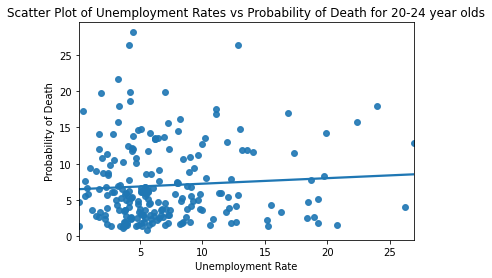

In [45]:
largest_unemployment_rate.plot.scatter(x="SL.UEM.TOTL.ZS", y="SH.DYN.2024", alpha=0.5)

x = databank["SL.UEM.TOTL.ZS"]
y = databank["SH.DYN.2024"]
sns.regplot(x = "SL.UEM.TOTL.ZS", y = "SH.DYN.2024", ci=None, data = databank)

plt.xlabel("Unemployment Rate")
plt.ylabel("Probability of Death")
plt.title("Scatter Plot of Unemployment Rates vs Probability of Death for 20-24 year olds")
# The x axis is unemployment rate
# The y axis is probability of death among 20-24 year olds

Text(0.5, 1.0, 'Probability of Death for 20-24 year olds vs Scatter Plot of Unemployment Rates')

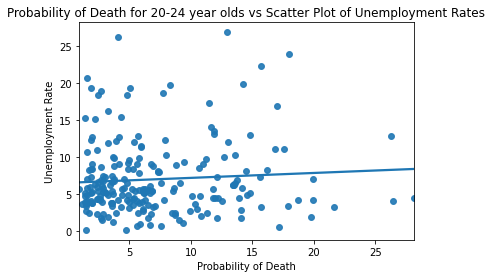

In [46]:
largest_probability_of_death.plot.scatter(x="SH.DYN.2024", y="SL.UEM.TOTL.ZS", alpha=0.5)

x = databank["SH.DYN.2024"]
y = databank["SL.UEM.TOTL.ZS"]
sns.regplot(x = "SH.DYN.2024", y = "SL.UEM.TOTL.ZS", ci=None, data = databank)

plt.xlabel("Probability of Death")
plt.ylabel("Unemployment Rate")
plt.title("Probability of Death for 20-24 year olds vs Scatter Plot of Unemployment Rates")
# The x axis is probability of death among 20-24 year olds
# The y axis is unemployment rate
# Same as last graph except x and y axis flipped.

# 6.Correlation
I next check the correlation between the 2 DataFrames using .corrwith() method and the closer to 1 or -1 means that there is a correlation. A 1 shows that if 1 axis increase, the other increases also. A -1 shows that if 1 axis increase, the other decreases.

In [47]:
largest_unemployment_rate.corrwith(largest_probability_of_death)

SL.UEM.TOTL.ZS    1.0
SH.DYN.2024       1.0
dtype: float64

# Conclusion
The .corrwith() method returns 1 for both which means there is correlation which makes sense looking at the graph. There are a few outliers but you can see that most of the dots are in the bottom left quadrant which signifies less unemployment means less chances of dying for 20-24 year olds. There is a correlation but correlation doesn't mean causation. This doesn't mean that higher unemployment rates actually causes more death for 20-24 year olds. There is just a correlation, not a causation.